In [1]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
배치 데이터 크기: (20, 224, 224, 3)
배치 레이블 크기: (20,)
배치 레이블: 1.0


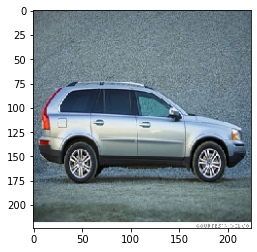

In [2]:
from IPython.display import Image, display, clear_output
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)   # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "car-damage-dataset/data1a/training"
validation_dir = 'car-damage-dataset/data1a/validation'

train_generator = train_datagen.flow_from_directory( \
        train_dir,         # 타깃 디렉터리
        target_size=(224, 224),             # 모든 이미지를 224 × 224 크기
        batch_size=20 ,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    print('배치 레이블:', labels_batch[0])
    break
    
import matplotlib.pyplot as plt
plt.imshow( train_generator[0][0][0])
plt.show()


In [3]:
# Initializing a Sequential model
model = Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))

# Creating an output layer
model.add(Dense(units= 1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

def vgg_16():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

In [5]:
# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/5
92/92 [==============================] - ETA: 0s - loss: 0.8586 - acc: 0.4815
Epoch 00001: val_acc improved from -inf to 0.52391, saving model to vgg_model.h5
92/92 [==============================] - 958s 10s/step - loss: 0.8586 - acc: 0.4815 - val_loss: 0.6925 - val_acc: 0.5239
Epoch 2/5
92/92 [==============================] - ETA: 0s - loss: 0.6699 - acc: 0.6038
Epoch 00002: val_acc improved from 0.52391 to 0.64565, saving model to vgg_model.h5
92/92 [==============================] - 850s 9s/step - loss: 0.6699 - acc: 0.6038 - val_loss: 0.6284 - val_acc: 0.6457
Epoch 3/5
92/92 [==============================] - ETA: 0s - loss: 0.5864 - acc: 0.6940
Epoch 00003: val_acc improved from 0.64565 to 0.71304, saving model to vgg_model.h5
92/92 [==============================] - 818s 9s/step - loss: 0.5864 - acc: 0.6940 - val_loss: 0.5613 - val_acc: 0.7130
Epoch 4/5
92/92 [==============================] - ETA: 0s - loss: 0.5001 - acc: 0.7707
Epoch 00004: val_acc improved from 0.7

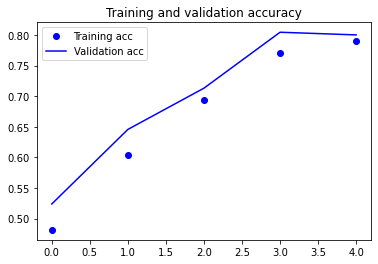

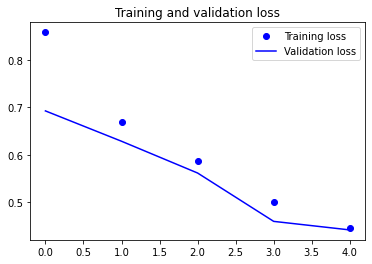

In [17]:
###########################################################
# 학습
###########################################################
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint ( "vgg_model.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', period = 1)
early = EarlyStopping (monitor = 'val_acc', min_delta = 0,patience = 20, verbose = 1, mode = 'auto')


history = model.fit_generator(steps_per_epoch=(1840/20),
                              generator=train_generator, 
                              validation_data= validation_generator, 
                              validation_steps=(460/20),
                              epochs=5,
                              callbacks=[checkpoint,early])

# history = model.fit_generator(train_generator,
#                              steps_per_epoch=int(1840/20),
#                              epochs = 5,
#                              validation_data = validation_generator,
#                              validation_steps =int(460/20))

 



###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

########################################################
import matplotlib.pyplot as plt
# print( model.predict( [[  train_generator[10][0][0] ]]) ) #
# plt.imshow(  train_generator[10][0][0] )
# plt.show()

Epoch 1/50
10/10 [==============================] - 101s 10s/step - loss: 1.5180 - acc: 0.5203 - val_loss: 0.6960 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to resnet_model.h5
Epoch 2/50
10/10 [==============================] - 97s 10s/step - loss: 0.6953 - acc: 0.5076 - val_loss: 0.6912 - val_acc: 0.5150

Epoch 00002: val_acc improved from 0.50000 to 0.51500, saving model to resnet_model.h5
Epoch 3/50
10/10 [==============================] - 109s 12s/step - loss: 0.6856 - acc: 0.5668 - val_loss: 0.6911 - val_acc: 0.5150

Epoch 00003: val_acc did not improve from 0.51500
Epoch 4/50
10/10 [==============================] - 96s 10s/step - loss: 0.6923 - acc: 0.4845 - val_loss: 0.6891 - val_acc: 0.5600

Epoch 00004: val_acc improved from 0.51500 to 0.56000, saving model to resnet_model.h5
Epoch 5/50
10/10 [==============================] - 101s 10s/step - loss: 0.6914 - acc: 0.4712 - val_loss: 0.6898 - val_acc: 0.5500

Epoch 00005: val_acc did not 

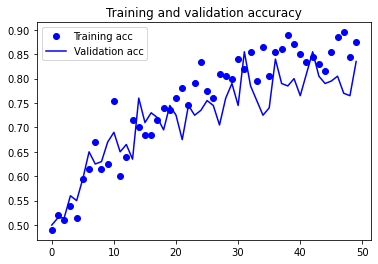

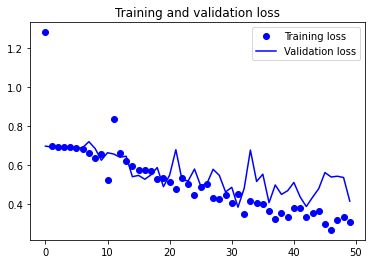

In [6]:
###########################################################
# 학습
###########################################################
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint ( "vgg_model.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', period = 1)
early = EarlyStopping (monitor = 'val_acc', min_delta = 0,patience = 20, verbose = 1, mode = 'auto')


history = model.fit_generator(steps_per_epoch=10,
                              generator=train_generator, 
                              validation_data= validation_generator, 
                              validation_steps=10,
                              epochs=50,
                              callbacks=[checkpoint,early])

# history = model.fit_generator(train_generator,
#                              steps_per_epoch=int(1840/20),
#                              epochs = 5,
#                              validation_data = validation_generator,
#                              validation_steps =int(460/20))

 



###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

########################################################
import matplotlib.pyplot as plt
# print( model.predict( [[  train_generator[10][0][0] ]]) ) #
# plt.imshow(  train_generator[10][0][0] )
# plt.show()

Epoch 1/50
10/10 [==============================] - 75s 7s/step - loss: 0.3238 - acc: 0.8400 - val_loss: 0.5382 - val_acc: 0.7450

Epoch 00001: val_acc improved from -inf to 0.74500, saving model to vgg_model.h5
Epoch 2/50
10/10 [==============================] - 96s 10s/step - loss: 0.3336 - acc: 0.8450 - val_loss: 0.5614 - val_acc: 0.7000

Epoch 00002: val_acc did not improve from 0.74500
Epoch 3/50
10/10 [==============================] - 146s 14s/step - loss: 0.2804 - acc: 0.8900 - val_loss: 0.4992 - val_acc: 0.7750

Epoch 00003: val_acc improved from 0.74500 to 0.77500, saving model to vgg_model.h5
Epoch 4/50
10/10 [==============================] - 170s 17s/step - loss: 0.2985 - acc: 0.8900 - val_loss: 0.5991 - val_acc: 0.7650

Epoch 00004: val_acc did not improve from 0.77500
Epoch 5/50
10/10 [==============================] - 158s 16s/step - loss: 0.2677 - acc: 0.8900 - val_loss: 0.4877 - val_acc: 0.8100

Epoch 00005: val_acc improved from 0.77500 to 0.81000, saving model to vg

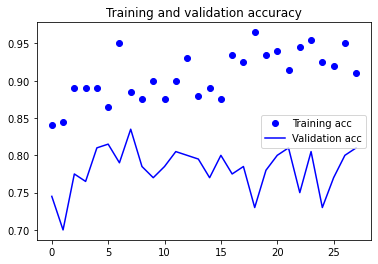

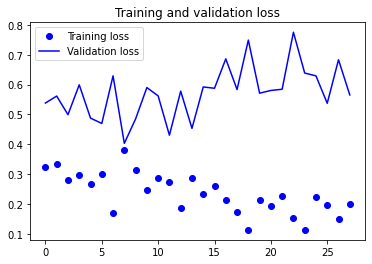

In [7]:
###########################################################
# 학습
###########################################################
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint ( "vgg_model.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', period = 1)
early = EarlyStopping (monitor = 'val_acc', min_delta = 0,patience = 20, verbose = 1, mode = 'auto')


history = model.fit_generator(steps_per_epoch=10,
                              generator=train_generator, 
                              validation_data= validation_generator, 
                              validation_steps=10,
                              epochs=50,
                              callbacks=[checkpoint,early])

# history = model.fit_generator(train_generator,
#                              steps_per_epoch=int(1840/20),
#                              epochs = 5,
#                              validation_data = validation_generator,
#                              validation_steps =int(460/20))

 



###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

########################################################
import matplotlib.pyplot as plt
# print( model.predict( [[  train_generator[10][0][0] ]]) ) #
# plt.imshow(  train_generator[10][0][0] )
# plt.show()